In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from copy import deepcopy

In [2]:
fp = "../generation_results/all_datasets_token_tracking_first_30.jsonl"
results = pd.read_json(fp, lines=True)
len(results)

120

In [3]:
def plot_token_tracking(df, data_key, data_tag, title):
    ops = ['Quoted ', 'Paraphrased ', 'Entailed ', 'Abstractive ']
    fluencies = []
    fluencies_std = []
    quoted_values = 0
    for op in ops:
        relevant_col = df[op+data_key]
        if (op != 'Quoted '):
            relevant_col += quoted_values
        else:
            quoted_values = deepcopy(relevant_col)
        relevant_col = relevant_col[relevant_col>0]
        fluencies.append(np.mean(relevant_col))
        fluencies_std.append(1.96*np.std(relevant_col, ddof=1) / np.sqrt(len(relevant_col)))

    color_str = 'orange'
    plt.bar(ops, fluencies, yerr=fluencies_std, color=['tab:'+color_str, 'tab:'+color_str, 'tab:'+color_str, 'tab:'+color_str])
    if (data_key == 'inference_run_count'):
        ylabel_text = 'Number of Inference runs'
    elif (data_key == 'inference_token_input_count'):
        ylabel_text = 'Input Token Count'
    else:
        ylabel_text = 'Output Token Count'
    plt.ylabel(ylabel_text)
    # plt.ylim(0,3)
    plt.xticks(rotation=15)
    plt.title(ylabel_text+' by Operating Point')
    plt.savefig('figures/'+data_key+'.png');

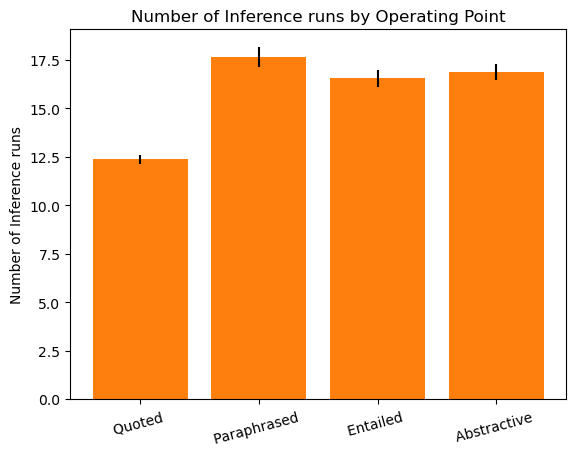

In [4]:
plot_token_tracking(results, 'inference_run_count', '','')

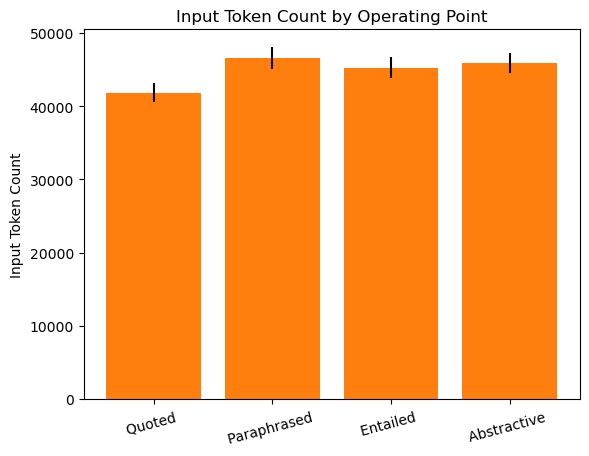

In [5]:
plot_token_tracking(results, 'inference_token_input_count', '','')

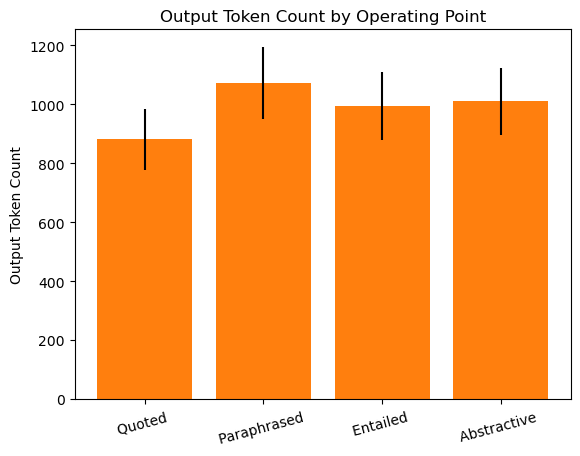

In [6]:
plot_token_tracking(results, 'inference_token_output_count', '','')